# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [64]:
# your answer here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
# your answer here
employee= pd.read_csv('data/Employee.csv')

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
employee.head()



,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [38]:
# Method 1
# your answer here

employee1 = pd.pivot_table(employee,values='Salary',index='Department')
employee1.head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [22]:
# Method 2
# your answer here
#1st vericalize
employee2 = employee.groupby('Department').agg({'Salary':'mean'})
employee2.head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [37]:
# your answer here
employee3 = pd.pivot_table(employee,values='Salary',index=['Department', 'Title'])

employee3.head()

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [43]:
# your answer here
employee4 = pd.pivot_table(employee,values=['Years', 'Salary'],index=['Title'])

employee4.head()

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [46]:
# your answer here
employee5 = employee.pivot_table(index=['Title','Department'], values= ['Salary'], aggfunc=['sum','count'])

employee5


sum  count
                     Salary Salary
Title     Department              
VP        HR             70      1
          IT             70      1
analyst   HR             65      2
          IT             65      2
associate IT             60      1
          Sales         110      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [54]:
# your answer here
employee6 = employee.pivot_table(index=['Title','Department'], values= ['Salary'], aggfunc=['median','min', 'max', 'std'])

employee6

#there is no variation for VPs in salary

median    min    max       std
                     Salary Salary Salary    Salary
Title     Department                               
VP        HR           70.0     70     70       NaN
          IT           70.0     70     70       NaN
analyst   HR           32.5     30     35  3.535534
          IT           32.5     30     35  3.535534
associate IT           60.0     60     60       NaN
          Sales        55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [55]:
# your answer here
employee6 = employee6.fillna(0)
employee6


median    min    max       std
                     Salary Salary Salary    Salary
Title     Department                               
VP        HR           70.0     70     70  0.000000
          IT           70.0     70     70  0.000000
analyst   HR           32.5     30     35  3.535534
          IT           32.5     30     35  3.535534
associate IT           60.0     60     60  0.000000
          Sales        55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [53]:
# your answer here
employee7 = employee.pivot_table(index=['Department'], values= ['Salary'], aggfunc=['count','sum'])

employee7



,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [58]:
# your answer here
employee8 = employee.pivot_table(index=['Title','Department'], values= ['Years','Salary'], aggfunc=['sum','mean'])
employee8[[( 'sum',  'Years'),('mean', 'Salary')]]



sum   mean
                     Years Salary
Title     Department             
VP        HR             8   70.0
          IT             8   70.0
analyst   HR             6   32.5
          IT             3   32.5
associate IT             7   60.0
          Sales          5   55.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [60]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [61]:
# your answer here
fitbit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [66]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

In [67]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [ ]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [69]:
# your answer here
fitbit['Steps'].corr(fitbit['Minutes Very Active'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

<function matplotlib.pyplot.show(close=None, block=None)>

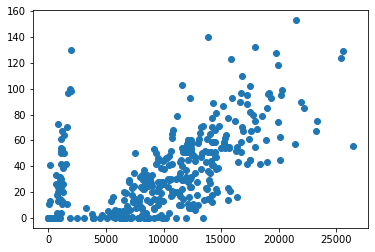

In [74]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])
plt.show


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
#they are highly positively correlated so when one variable increases the other tends to increase as well


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [71]:
# your answer here
fitbit['Steps'].corr(fitbit['Minutes Sedentary'])


0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

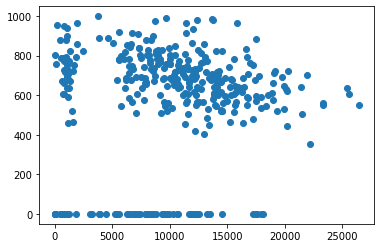

In [73]:
# your answer here\
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])
plt.show



#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

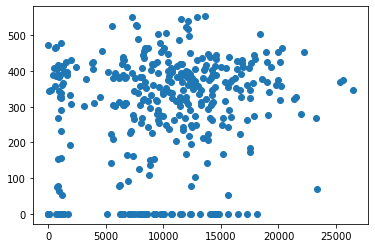

In [76]:
# your answer here
fitbit['Steps'].corr(fitbit['MinutesOfSleep'])

plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])
plt.show




#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [78]:
# your answer here
data= fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
data


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [85]:
import seaborn as sn
import matplotlib.pyplot as plt

cor_fit = data.corr()
cor_fit


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


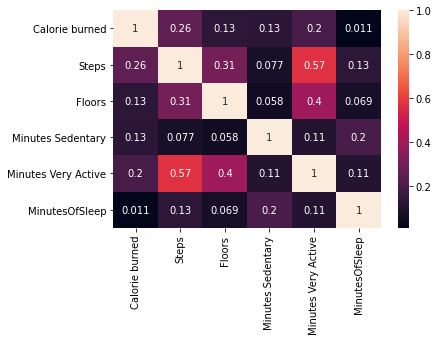

In [86]:
sn.heatmap(cor_fit, annot=True)
plt.show()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [87]:
# your answer here
cor_fit.sort_values('Steps', ascending=False)


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [88]:
# your answer here
time_grades= pd.read_csv('data/Time_Grades.csv')


#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

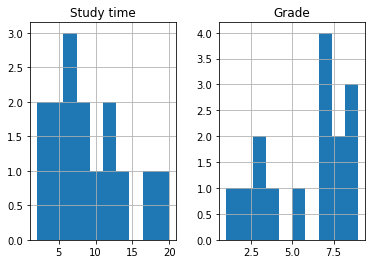

In [89]:
# your answer here
time_grades.hist()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [96]:
# Pearson
print(time_grades.corr(method='pearson'))





            Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000


In [97]:
#Spearman 

print(time_grades.corr(method='spearman'))


            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000


In [ ]:
#The spearman method considers the ranking of the variables instead of its absolute value.
#The spearman correlation is higher bc  pearson focuses on linear correlation, whereas spearman
#takes into account non-linear relationships between variables. 

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [92]:
# your answer here
cor_sgrade = time_grades.corr()
cor_sgrade




,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


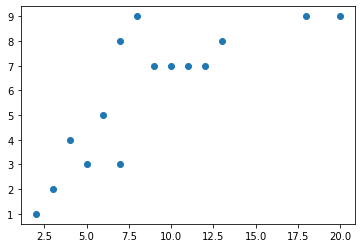

In [95]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

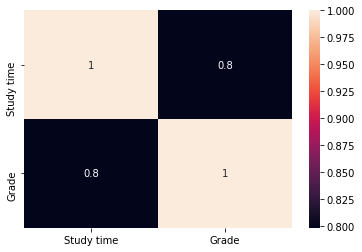

In [94]:
sn.heatmap(cor_sgrade, annot=True)
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
